# A Primer on Empirical Risk Minimization

##  Notations and Definitions

<p>Let's first set up some notation and ideas:</p>
<ul>
<li>Let $X \in \mathbb{R}^p$ be a $p$-dimensional real valued vector of predictor variables</li>
<br>
<li>Let $Y$ be a target variable, where 
<ul>
<li> $Y\in \mathbb{R}$ is real valued</li> 
<li> $Y\in C$ is an element in some set of classes $C=\{c_1,c_2,...c_k\}$</li> 
</ul>
</li>
<br>
<li>$X$ and $Y$ are governed by a joint distribution $P(Y,X)$ (that we likely don't know)</li>
<br>
<li>We seek a function $f(X)$ for predicting $Y$, given $X$, whose output can be</li>
<ul>
<li> Real valued, i.e. $f(X)=E[Y|X]$</li> 
<li> Discrete valued, i.e. $f(x) \in \{c_1,c_2,...c_k\}$</li> 
</ul>
</ul>

<p>Second, let's define two more things</p>
<ul>
<br>
<li>$\mathbb{F}$ is a family of functions, such that $f(x) \in \mathbb{F}$, examples are:
<ul>
<li> All linear hyper-planes, such that $f(x)=\alpha+\beta x$ </li>
<li> All quadratic polynomials, such that $f(x)=\alpha+\beta_1 x +\beta_2x^2$ </li>
<li> All decision trees with max(depth)=$k$</li>
</ul>
</li>
<br>
<li> A loss function $\mathbb{L}(f(X),Y)$ that measures how well $f(X)$ approximates $Y$.
<ul>
<li> Squared Loss:  $\mathbb{L}(f(x),y)=(f(x)-y)^2$</li>
<li> 0-1 Loss:  $\mathbb{L}(f(x),y)=\mathbb{I}(f(x)==y)$</li>
<li> Logistic Loss:  $\mathbb{L}(f(x),y)=-[y*Ln(f(x))+(1-y)*Ln(1-f(x))]$</li>
<li> Hinge Loss:  $\mathbb{L}(f(x),y)=max(0,1-f(x)*y)$</li>
</ul>
</ul>

## Emprical Risk Minimization

<p>The main goal of Supervised Learning can be stated using the Empirical Risk Minimization framework of Statistical Learning.<br><br>
We are looking for a function <span style="color:red">$f\in \mathbb{F}$</span> that minimizes the expected loss: 
<br>
<br>
<center><span style="color:red">$E[\mathbb{L}(f(x),y)]=\int \mathbb{L}(f(x),y)\, P(x,y)\:\mathrm{d}x\mathrm{d}y$</span></center>

<br>
Because we don't know the distribution <span style="color:red">$P(X,Y)$</span>, we can't minimize the expected loss. However, we can minimize the empirical loss, or risk, by computing the average loss over our training data.<br><br> Thus, in Supervised Learning, we choose the function <span style="color:red">$f(X)$</span> that minimizes the loss over training data:
<br><br>
<center><span style="color:red">$f^{opt}= \underset{f \in \mathbb{F}} {\mathrm{argmin}} \frac{1}{n} \sum\limits_{i=1}^n \mathbb{L}(f(x_i),y_i)$</span></center>


</p>

# Logistic Regression

## Definition

<p><b>Logistic Regression:</b> a member of the class of generalized linear models (glm) using the logit as its link function.<br><br>

The goal of Logistic Regression is to model the posterior probability of membership in class <span style="color:red">$c_i$</span> as a function of <span style="color:red">$X$</span>. I.e.,
<br>
<br>
<br>
<center><span style="color:red">$P(c_i|x)=f(x)=\frac{1}{1+e^{-(\alpha+\beta x))}}$</span></center>
<br>
<br>
To make this a linear model in <span style="color:red">$X$</span>, we take the log of the odds ratio of <span style="color:red">$p$</span> (called the log-odds):
<br>
<br>
<br>
<center><span style="color:red">$ln \frac{P(c_i|x)}{1-P(c_i|x)} = ln \frac{1}{e^{-(\alpha+\beta x))}} = \alpha+\beta x$</span></center>
<br>
<br>
And effectively we do a linear regression against the log-odds of <span style="color:red">$P(c_i|x)$</span> (though we don't use least squares).
</p>

## LogReg as ERM

<p>How do we fit Logistic Regression into the ERM framework?<br><br>

We find the parameters <span style="color:red">$\alpha$</span> and <span style="color:red">$\beta$</span> using the method of <u>Maximum Likelihood Estimation</u>.<br><br>

If we consider each observation to be an indepedent Bernoulli draw with <span style="color:red">$p_i=P(y_i|x_i)$</span>, then the likelihood of each draw can be defined as: <span style="color:red">$p_i^{y_i}(1-p_i)^{1-y_i}$</span>, with <span style="color:red">$p_i$</span> given by the inverse logit function. In MLE, we wish to maximize the likelihood of observing the data as a function of the independent parameters of the model (i.e., <span style="color:red">$\alpha$</span> and <span style="color:red">$\beta$</span>). The total likelihood function looks like:<br><br>

<center><span style="color:red">$L(\alpha,\beta|X,Y)=\prod\limits_{i=1}^nP(x_i,y_i|\alpha,\beta)=\prod\limits_{i=1}^np_i^{y_i}(1-p_i)^{1-y_i}$</span></center>
<br><br>
This is actually a difficult equation to maximize directly, so we do a little trick. We take the negative log and call this our loss function for ERM!

<center><span style="color:red">$\mathbb{L}(f(X),Y)=-Ln [L(\alpha,\beta|X,Y)]=-\sum\limits_{i=1}^n y_i\,ln\,(p_i)+(1-y_i)\,ln\,(1-p_i)$</span></center>







</p>

## Example 1 - Building and Looking at a Model

In [1]:
'''
Let's train an actual model and see how well it generalizes
'''
import math
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn import linear_model
import numpy as np
import os
import course_utils as bd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import imp
imp.reload(bd)
%matplotlib inline

#For mac users
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'
#For window's users, hardcode the dir:
#datadir = 


#Load data and downsample for a 1/10 pos/neg ratio, then split into a train/test
f = datadir + 'ads_dataset_cut.txt'
target = 'y_buy'
tdat = pd.read_csv(f, header = 0, sep = '\t')
moddat = bd.downSample(tdat, target, 10)

#We know the dataset is sorted so we can just split by index
train_split = 0.75
train = moddat[:int(math.floor(moddat.shape[0]*train_split))]
test = moddat[int(math.floor(moddat.shape[0]*train_split)):]

#Using Scikit-learn the model is built with two easy steps.
logreg = linear_model.LogisticRegression(C = 1e30)
logreg.fit(train.drop(target, 1), train[target])

#But we are going to also build using the statsmodel package
logit_sm = sm.Logit(train[target], train.drop(target, 1))
lr_fit = logit_sm.fit()

Optimization terminated successfully.
         Current function value: 0.247721
         Iterations 9


<p>Logistic Regression has long been used as a tool in statistics and econometrics so there are a lot of additional data points one can get out of logistic regression model than one might get with standard machine learning tools.<br><br>
We showed how to use scikit-learn to fit a model, but we also used statsmodel. The reason is that statsmodel returns summary statistics on each coefficient fit to the variables. In machine learning, we often only focus on the generalizability of the prediction. But in many analytical applications we want to know how statistically significant are the estimates within our model.
</p>

In [2]:
#Use statsmodel if you want to understand the fit statistics of the LR model
lr_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_buy   No. Observations:                 2087
Model:                          Logit   Df Residuals:                     2074
Method:                           MLE   Df Model:                           12
Date:                Wed, 05 Oct 2016   Pseudo R-squ.:                  0.1663
Time:                        12:34:32   Log-Likelihood:                -516.99
converged:                       True   LL-Null:                       -620.15
                                        LLR p-value:                 1.615e-37
=======================================================================================
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
isbuyer                 0.5710      0.559      1.021      0.307        -0.525     1.667
buy_freq               -0.0310      0.474     -0.065      0.948        -0.961     0.899
visit_freq             -0.0178      0.018     -1.005      0.315        -0.052     0.017
buy_interval           -0.0166      0.014     -1.196      0.232        -0.044     0.011
sv_interval             0.0040      0.007      0.555      0.579        -0.010     0.018
expected_time_buy       0.0194      0.012      1.628      0.104        -0.004     0.043
expected_time_visit    -0.0334      0.008     -4.206      0.000        -0.049    -0.018
last_buy                0.0196      0.005      3.671      0.000         0.009     0.030
last_visit             -0.0665      0.006    -10.705      0.000        -0.079    -0.054
multiple_buy            2.5503      1.328      1.920      0.055        -0.053     5.154
multiple_visit          0.1440      0.211      0.684      0.494        -0.269     0.557
uniq_urls              -0.0089      0.002     -5.357      0.000        -0.012    -0.006
num_checkins        -2.108e-05   9.75e-05     -0.216      0.829        -0.000     0.000
=======================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

<p>
<b>A Practical Aside</b><br><br>

What exactly does the estimate of $\beta$ really mean? How can we interpret it?<br><br>

Recall that $Ln \frac{p}{1-p}=\alpha+\beta x$. This means that a unit change in the value of $x$ changes the log-odds by the value of $\beta$. This is a mathematical statement that IMHO does not offer much intuitive value.<br><br>

<center><span style="color:red">So what can we learn by looking at betas? (IMHO, not much!)</span></center><br><Br>
<b>Some helpful tips, garnered from theory and experience:</b>
<ul>
<li>$|\beta_1|>|\beta_2|$ does not guarantee that feature $X_1$ is more predictive than $X_2$. The magnitude of $\beta$ is inversely proportional to the scale of $X$, so comparing betas only makes sense when the features have the same scale (such as binary features).</li><br>
<li>Likewise, the z-score of $\beta$ is influences by sample size and should not be used to rank features by predictiveness</li><br>
<li>sign($\beta$) does tell you whether $Y$ is positively or negatively correlated with $X$. However, if the features have a lot of multi-collinearity, sign($\beta$) can be misleading.</li><br>
<li>Multi-collinearity in $X$ means the betas will have covariance with each other. The betas will "split" the effect. Sometimes they'll split the effect as positive numbers (i.e. 1=0.5+0.5) and other times they'll split as negatives (i.e., 1=2-1). This makes interpreting $\beta$ that much more difficult.
</ul>

</p>

## Example 2 - Robustness

<p>In this example we test the sensitivity of out-of-sample performance to training set sample size. Our goal is to plot test-set $AUC$ as a function of $N$, the number of samples in the training set. Because we expect a lot of variance in the lower range of $N$, we use bootstrap algorithm to compute standard errors of AUC measurements.<br><br>

<b>To Bootstrap:</b>
<ul>
    <li>Generate $k$ training sets of size $N$, where we sample from original training set with replacement.</li>
    <li>Compute and store the AUC on the test set for each bootstrapped sample</li>
    <li>Get Mean and Standard Error of bootstrapped AUC estimates</li>
</ul>


</p>

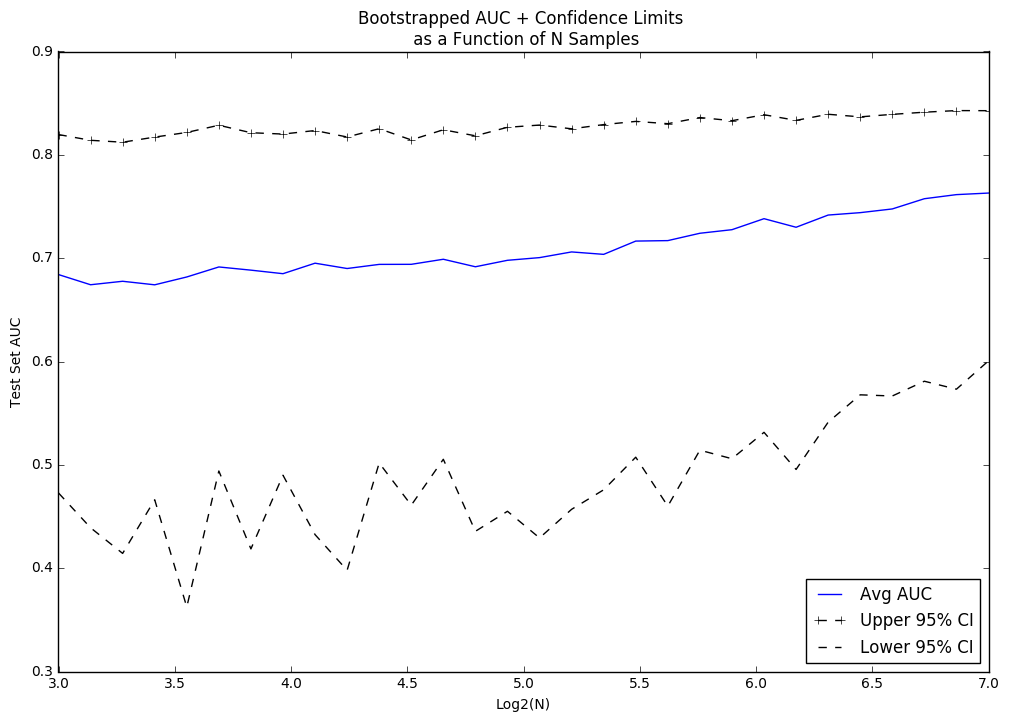

In [3]:
'''
The datasets train and test are defined in the above examples.
'''

target='y_buy'

def modAUC(X_train, Y_train, X_test, Y_test):
    '''
    trains a model on train set and returns AUC on test set
    '''
    logreg = linear_model.LogisticRegression(C = 10)
    logreg.fit(X_train, Y_train)
    return roc_auc_score(Y_test, logreg.predict_proba(X_test)[:, 1])

def LrBootstrapper(train, test, nruns, sampsize):
    '''
    Samples with replacement, runs multiple train/eval attempts
    returns mean and stdev of AUC
    '''
    auc_res = []
    for i in range(nruns):
        train_samp = train.iloc[np.random.randint(0, len(train), size=sampsize)]
        try:
            auc_res.append(modAUC(train_samp.drop(target,1), train_samp[target], test.drop(target,1), test[target]))
        except:
            oops = 1
    return (np.mean(auc_res), np.percentile(auc_res, 2.5), np.percentile(auc_res, 97.5))
            
#Run the analysis  
n_seq = np.logspace(3, 7, base=2.0, num=30)

avg = []; lowers = []; uppers = []; sz = []
for n in n_seq:
    mu, low, up =LrBootstrapper(train, test, 500, int(n))
    avg.append(mu)
    lowers.append(low)
    uppers.append(up)
    sz.append(n)    

    


#Plot the analysis
#lower = np.ones(len(avg)) * (avg[len(avg)-1]-1.96*stderr[len(avg)-1])

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.title('Bootstrapped AUC + Confidence Limits \n as a Function of N Samples')
plt.plot(np.log2(n_seq), np.array(avg), label='Avg AUC')
#plt.plot(np.log2(n_seq), np.array(avg) + 1.96 * np.array(stderr), 'k--+', label = 'Upper 95% CI')
#plt.plot(np.log2(n_seq), np.array(avg) - 1.96 * np.array(stderr), 'k--', label = 'Lower 95% CI')

plt.plot(np.log2(n_seq), np.array(uppers), 'k--+', label = 'Upper 95% CI')
plt.plot(np.log2(n_seq), np.array(lowers), 'k--', label = 'Lower 95% CI')

#plt.plot(np.log2(n_seq), lower,'r-')

plt.legend(loc = 4)
ax.set_xlabel('Log2(N)')
ax.set_ylabel('Test Set AUC')

<p>We can see in the above plot that Logistic Regression does fairly well with small sample sizes. The lower bound of the $95%$ at the $max(N)$ overlaps with the confidence interval at most levels of $N$, suggesting that in expectation, the smaller samples could perform as well as the larger samples.<br><br>

While this is true, always try to use as much data as you can to reduce the variance!

</p> 